<a href="https://colab.research.google.com/github/Rishikesh11kr/Coding/blob/main/Stocks%20Prices%20Prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install tensorflow


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [4]:
# Replace "AAPL" with the stock symbol you want
stock_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2023-01-01"

data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False)
data = data[['Close']]


In [5]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [6]:
train_size = int(len(data) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]


In [7]:
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i : i + time_steps, 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 30
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)


In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [9]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)


In [11]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


20/20 [==============================] - 0s 6ms/step


In [12]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


In [13]:
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Train RMSE: 0.91
Test RMSE: 5.53


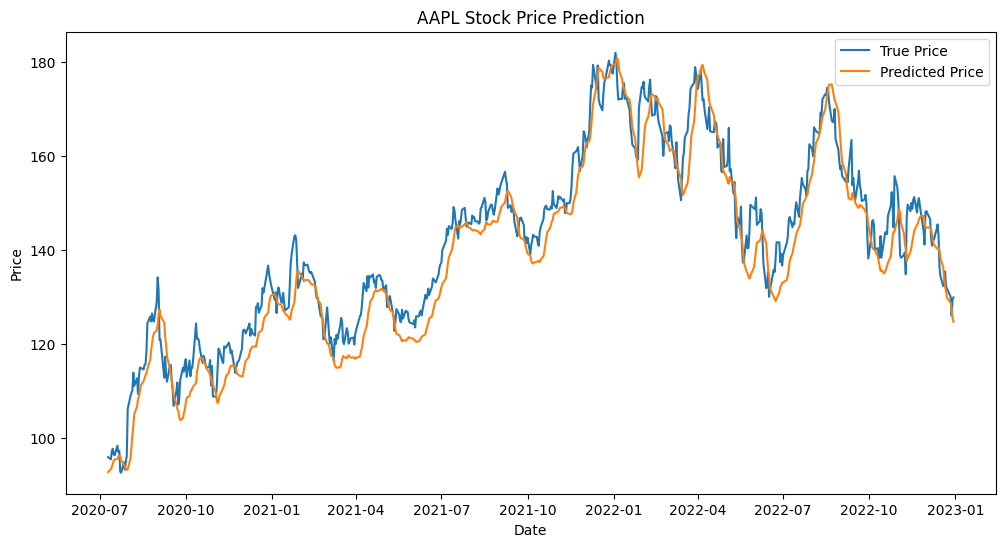

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test[0]):], y_test[0], label='True Price')
plt.plot(data.index[-len(y_test[0]):], test_predict[:, 0], label='Predicted Price')
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
